# SAM2

In [1]:
%matplotlib tk
import torch
import PIL
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

d:\WPI\MQP\CoronalHoles\src\playground\sam\sam2\sam2\modeling\backbones\hieradet.py:70: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  x = F.scaled_dot_product_attention(


In [2]:
# Shows the most granular mask on top of the image
def show_mask(mask, ax):
    color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
        
    # Reshape the mask to the original image size
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

    # Display the mask on the image
    ax.imshow(mask_image)

In [3]:
from sam2.sam2_image_predictor import SAM2ImagePredictor
predictor = SAM2ImagePredictor.from_pretrained("facebook/sam2-hiera-small")

d:\WPI\MQP\CoronalHoles\src\playground\sam\sam2\sam2\modeling\sam\transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [5]:
# image_path = "D:\\WPI\\MQP\\CoronalHoles\\src\\playground\\sam\\193A_CHExample.jpg"
# image_path = "D:\\WPI\\MQP\\CoronalHoles\\src\\playground\\kmeans\\193A.png"
image_path = "D:\\WPI\\MQP\\CoronalHoles\\src\\playground\\sam\\193A_Example_Upright.png"

img = PIL.Image.open(image_path)
img = img.convert("RGB")
image_array = np.array(img)


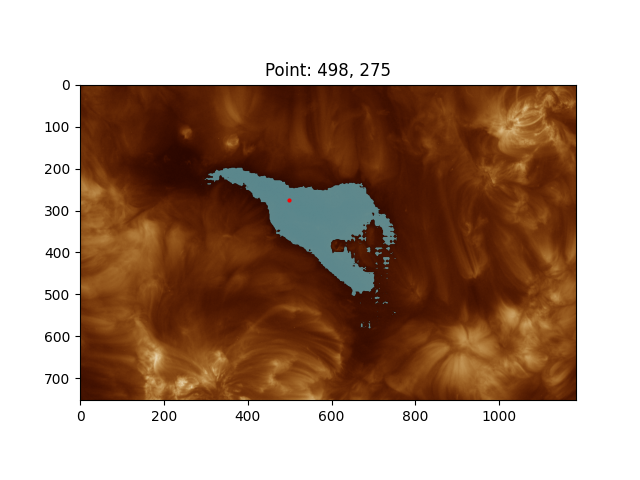

In [6]:
def on_click(event):
    x, y = event.xdata, event.ydata
    x, y = int(x), int(y)
    # input_point =np.array([[x, y]])
    input_point =np.array([[498, 275]])
    # bound_box = np.array([1140, 1510, 1910, 2080])
    input_label = np.array([1])

    with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
        predictor.set_image(image_array)
        masks, scores, _ = predictor.predict(point_coords=input_point, point_labels=input_label)
        # masks, scores, _ = predictor.predict(box=bound_box)

    sorted_ind = np.argsort(scores)[::-1]
    masks = masks[sorted_ind]

    show_mask(masks[-1], ax)
    ax.plot(input_point[0][0], input_point[0][1], 'ro', markersize=2)
    
    plt.title(f"Point: {input_point[0][0]}, {input_point[0][1]}")
    fig.canvas.draw()
    plt.savefig("./output.png")
    display(Image("./output.png"))

    
fig, ax = plt.subplots()
plt.imshow(image_array)
cid = fig.canvas.mpl_connect('button_press_event', on_click)
plt.title("Click on a point in the image")
plt.show()